## Feature Engineering in RAM-Limited Data, Part 5

#### CV for mean encoding of `target_combine`

#### CV@2015-12-28:
- benchmark: val = 1.62857
- with only `ind_actividad_client_combine`, `tiprel_1mes_combine`, `target_combine`, mlogloss=1.57141
- with `ind_actividad_client_combine`, `tiprel_1mes_combine`, `target_combine`, `n_products` and patterns: val = 1.31122
    - Private score: 0.0302475, public score: 0.0299266

- with all above and mean encoding of target indicator and target #products: mlogloss=1.30756
    - Private score: 0.0302597, public score: 0.0299519
    
- with all above and mean encoding of each product: mlogloss=1.29115
    - Private score: 0.0301206, public score: 0.0297601
- with all above and 120 trees: mlogloss=1.15386
    - Private score 0.0301176, public score 0.0297002

In [1]:
from santander_helper import *
%matplotlib inline

Generate data

In [2]:
x_train, y_train = create_train_test('2015-06-28', target_flag=True, pattern_flag=True)

Loading 2015-05-28 data
Loading 2015-06-28 data
Products in 2015-06-28
Products in 2015-05-28
New products added in 2015-06-28
Join customer features and previous month products for 2015-06-28
Concatenate this and previous months ind_activadad_cliente
Concatenate this and previous months tiprel_1mes
Combine all products for each customer

Start counting patterns:
Encoding pattern...


100%|████████████████████████████████████████████████████████████████████████| 640825/640825 [01:42<00:00, 6249.66it/s]


Finding pattern...
Counting pattern...


100%|████████████████████████████████████████████████████████████████████████| 634760/634760 [03:13<00:00, 3286.08it/s]


Prepare target
Time used: 6.167 min


In [3]:
x_val, y_val = create_train_test('2015-12-28', max_lag=5, target_flag=True, pattern_flag=True)

Loading 2015-11-28 data
Loading 2015-12-28 data
Products in 2015-12-28
Products in 2015-11-28
New products added in 2015-12-28
Join customer features and previous month products for 2015-12-28
Concatenate this and previous months ind_activadad_cliente
Concatenate this and previous months tiprel_1mes
Combine all products for each customer

Start counting patterns:
Encoding pattern...


100%|████████████████████████████████████████████████████████████████████████| 912728/912728 [02:22<00:00, 6398.12it/s]


Finding pattern...
Counting pattern...


100%|████████████████████████████████████████████████████████████████████████| 893990/893990 [04:29<00:00, 3318.78it/s]


Prepare target
Time used: 8.612 min


In [4]:
x_test = create_train_test('2016-06-28', max_lag=5, target_flag=False, pattern_flag=True)

Loading 2016-05-28 data
Loading 2016-06-28 data
Products in 2016-06-28
Products in 2016-05-28
New products added in 2016-06-28
Join customer features and previous month products for 2016-06-28
Concatenate this and previous months ind_activadad_cliente
Concatenate this and previous months tiprel_1mes
Combine all products for each customer

Start counting patterns:
Encoding pattern...


100%|████████████████████████████████████████████████████████████████████████| 938423/938423 [02:28<00:00, 6321.45it/s]


Finding pattern...
Counting pattern...


100%|████████████████████████████████████████████████████████████████████████| 930436/930436 [04:41<00:00, 3300.62it/s]


Time used: 7.568 min


## Train model

- benchmark: val = 1.62857
- with only `ind_actividad_client_combine`, `tiprel_1mes_combine`, `target_combine`, mlogloss=1.57141
- with `ind_actividad_client_combine`, `tiprel_1mes_combine`, `target_combine`, `n_products` and patterns: val = 1.31122
- with all above and mean encoding of target indicator and target #products: mlogloss=1.30756
- with all above and mean encoding of each product: mlogloss=1.29115
- with all above and 120 trees: mlogloss=1.15386
    - Private score 0.0301176, public score 0.0297002

In [11]:
param = {'objective': 'multi:softprob', 
         'eta': 0.05, 
         'max_depth': 8, 
         'silent': 1, 
         'num_class': len(target_cols),
         'eval_metric': 'mlogloss',
         'min_child_weight': 1,
         'subsample': 0.7,
         'colsample_bytree': 0.7,
         'seed': 0}
num_rounds = 120

dtrain = xgb.DMatrix(x_train.values, y_train.values)
dval = xgb.DMatrix(x_val.values, y_val.values)

train_history = {}
np.random.seed(0)
for n in range(10):
    train_history[n] = {}
    param['seed'] = np.random.randint(10**6)
    model = xgb.train(param, dtrain, num_rounds, evals=[(dtrain, 'train'), (dval, 'val')], 
        verbose_eval=True, evals_result=train_history[n])

[0]	train-mlogloss:2.70903	val-mlogloss:2.73873
[1]	train-mlogloss:2.53678	val-mlogloss:2.59098
[2]	train-mlogloss:2.40034	val-mlogloss:2.46699
[3]	train-mlogloss:2.28557	val-mlogloss:2.36497
[4]	train-mlogloss:2.18614	val-mlogloss:2.27827
[5]	train-mlogloss:2.09942	val-mlogloss:2.20174
[6]	train-mlogloss:2.02198	val-mlogloss:2.13291
[7]	train-mlogloss:1.95192	val-mlogloss:2.07303
[8]	train-mlogloss:1.88901	val-mlogloss:2.01858
[9]	train-mlogloss:1.83189	val-mlogloss:1.96977
[10]	train-mlogloss:1.77926	val-mlogloss:1.92354
[11]	train-mlogloss:1.73043	val-mlogloss:1.88093
[12]	train-mlogloss:1.68511	val-mlogloss:1.84279
[13]	train-mlogloss:1.64311	val-mlogloss:1.8066
[14]	train-mlogloss:1.60385	val-mlogloss:1.77342
[15]	train-mlogloss:1.56708	val-mlogloss:1.74457
[16]	train-mlogloss:1.53271	val-mlogloss:1.7145
[17]	train-mlogloss:1.50018	val-mlogloss:1.68711
[18]	train-mlogloss:1.46977	val-mlogloss:1.66147
[19]	train-mlogloss:1.4415	val-mlogloss:1.6371
[20]	train-mlogloss:1.41427	val-ml

[47]	train-mlogloss:1.01553	val-mlogloss:1.30178
[48]	train-mlogloss:1.00791	val-mlogloss:1.2952
[49]	train-mlogloss:1.00061	val-mlogloss:1.29006
[50]	train-mlogloss:0.993419	val-mlogloss:1.28477
[51]	train-mlogloss:0.986504	val-mlogloss:1.2796
[52]	train-mlogloss:0.979822	val-mlogloss:1.27468
[53]	train-mlogloss:0.973301	val-mlogloss:1.26956
[54]	train-mlogloss:0.966878	val-mlogloss:1.26476
[55]	train-mlogloss:0.960928	val-mlogloss:1.26095
[56]	train-mlogloss:0.955069	val-mlogloss:1.25738
[57]	train-mlogloss:0.949447	val-mlogloss:1.25368
[58]	train-mlogloss:0.943923	val-mlogloss:1.24928
[59]	train-mlogloss:0.938519	val-mlogloss:1.24521
[60]	train-mlogloss:0.933382	val-mlogloss:1.24124
[61]	train-mlogloss:0.92848	val-mlogloss:1.23766
[62]	train-mlogloss:0.923568	val-mlogloss:1.23393
[63]	train-mlogloss:0.918872	val-mlogloss:1.23063
[64]	train-mlogloss:0.914347	val-mlogloss:1.2275
[65]	train-mlogloss:0.90998	val-mlogloss:1.22416
[66]	train-mlogloss:0.905757	val-mlogloss:1.22161
[67]	tra

[93]	train-mlogloss:0.824573	val-mlogloss:1.16867
[94]	train-mlogloss:0.822447	val-mlogloss:1.16754
[95]	train-mlogloss:0.82027	val-mlogloss:1.16648
[96]	train-mlogloss:0.818053	val-mlogloss:1.16515
[97]	train-mlogloss:0.816114	val-mlogloss:1.16433
[98]	train-mlogloss:0.814095	val-mlogloss:1.16362
[99]	train-mlogloss:0.812181	val-mlogloss:1.1626
[100]	train-mlogloss:0.81038	val-mlogloss:1.16153
[101]	train-mlogloss:0.808503	val-mlogloss:1.16062
[102]	train-mlogloss:0.806586	val-mlogloss:1.15979
[103]	train-mlogloss:0.804689	val-mlogloss:1.15928
[104]	train-mlogloss:0.80286	val-mlogloss:1.15847
[105]	train-mlogloss:0.800998	val-mlogloss:1.1578
[106]	train-mlogloss:0.799328	val-mlogloss:1.1569
[107]	train-mlogloss:0.797707	val-mlogloss:1.15614
[108]	train-mlogloss:0.796027	val-mlogloss:1.15534
[109]	train-mlogloss:0.79438	val-mlogloss:1.15474
[110]	train-mlogloss:0.792708	val-mlogloss:1.15412
[111]	train-mlogloss:0.791001	val-mlogloss:1.15336
[112]	train-mlogloss:0.789349	val-mlogloss:1.

[19]	train-mlogloss:1.442	val-mlogloss:1.63388
[20]	train-mlogloss:1.41485	val-mlogloss:1.61031
[21]	train-mlogloss:1.389	val-mlogloss:1.58781
[22]	train-mlogloss:1.36459	val-mlogloss:1.56978
[23]	train-mlogloss:1.34153	val-mlogloss:1.55031
[24]	train-mlogloss:1.31953	val-mlogloss:1.533
[25]	train-mlogloss:1.29883	val-mlogloss:1.51545
[26]	train-mlogloss:1.27881	val-mlogloss:1.4997
[27]	train-mlogloss:1.25969	val-mlogloss:1.48324
[28]	train-mlogloss:1.2419	val-mlogloss:1.4689
[29]	train-mlogloss:1.2246	val-mlogloss:1.4542
[30]	train-mlogloss:1.20843	val-mlogloss:1.4407
[31]	train-mlogloss:1.19266	val-mlogloss:1.42752
[32]	train-mlogloss:1.17763	val-mlogloss:1.41633
[33]	train-mlogloss:1.16341	val-mlogloss:1.40455
[34]	train-mlogloss:1.14975	val-mlogloss:1.39329
[35]	train-mlogloss:1.13644	val-mlogloss:1.38272
[36]	train-mlogloss:1.12376	val-mlogloss:1.37297
[37]	train-mlogloss:1.11179	val-mlogloss:1.36341
[38]	train-mlogloss:1.10014	val-mlogloss:1.35411
[39]	train-mlogloss:1.0892	val-m

[66]	train-mlogloss:0.905781	val-mlogloss:1.22447
[67]	train-mlogloss:0.901656	val-mlogloss:1.2218
[68]	train-mlogloss:0.897616	val-mlogloss:1.21892
[69]	train-mlogloss:0.893733	val-mlogloss:1.21686
[70]	train-mlogloss:0.889898	val-mlogloss:1.21372
[71]	train-mlogloss:0.88606	val-mlogloss:1.21117
[72]	train-mlogloss:0.88239	val-mlogloss:1.20915
[73]	train-mlogloss:0.878822	val-mlogloss:1.20665
[74]	train-mlogloss:0.875432	val-mlogloss:1.20419
[75]	train-mlogloss:0.872181	val-mlogloss:1.20201
[76]	train-mlogloss:0.868943	val-mlogloss:1.20003
[77]	train-mlogloss:0.865786	val-mlogloss:1.19758
[78]	train-mlogloss:0.862805	val-mlogloss:1.19521
[79]	train-mlogloss:0.859778	val-mlogloss:1.19306
[80]	train-mlogloss:0.856934	val-mlogloss:1.19114
[81]	train-mlogloss:0.854072	val-mlogloss:1.18956
[82]	train-mlogloss:0.851156	val-mlogloss:1.18786
[83]	train-mlogloss:0.848426	val-mlogloss:1.18591
[84]	train-mlogloss:0.845659	val-mlogloss:1.18423
[85]	train-mlogloss:0.843076	val-mlogloss:1.18262
[86

[111]	train-mlogloss:0.791283	val-mlogloss:1.15474
[112]	train-mlogloss:0.789718	val-mlogloss:1.15409
[113]	train-mlogloss:0.788204	val-mlogloss:1.15369
[114]	train-mlogloss:0.786669	val-mlogloss:1.1532
[115]	train-mlogloss:0.785237	val-mlogloss:1.15273
[116]	train-mlogloss:0.78378	val-mlogloss:1.15252
[117]	train-mlogloss:0.782324	val-mlogloss:1.15221
[118]	train-mlogloss:0.780832	val-mlogloss:1.15169
[119]	train-mlogloss:0.779305	val-mlogloss:1.15147
[0]	train-mlogloss:2.7084	val-mlogloss:2.73852
[1]	train-mlogloss:2.5353	val-mlogloss:2.58312
[2]	train-mlogloss:2.39832	val-mlogloss:2.46542
[3]	train-mlogloss:2.28348	val-mlogloss:2.36825
[4]	train-mlogloss:2.18423	val-mlogloss:2.2809
[5]	train-mlogloss:2.09749	val-mlogloss:2.20285
[6]	train-mlogloss:2.02045	val-mlogloss:2.13501
[7]	train-mlogloss:1.95103	val-mlogloss:2.07206
[8]	train-mlogloss:1.88885	val-mlogloss:2.01627
[9]	train-mlogloss:1.83159	val-mlogloss:1.96581
[10]	train-mlogloss:1.77842	val-mlogloss:1.91902
[11]	train-mloglo

[38]	train-mlogloss:1.10111	val-mlogloss:1.36673
[39]	train-mlogloss:1.09033	val-mlogloss:1.35798
[40]	train-mlogloss:1.07975	val-mlogloss:1.34941
[41]	train-mlogloss:1.06955	val-mlogloss:1.34152
[42]	train-mlogloss:1.06004	val-mlogloss:1.33435
[43]	train-mlogloss:1.05069	val-mlogloss:1.32682
[44]	train-mlogloss:1.04163	val-mlogloss:1.32021
[45]	train-mlogloss:1.03301	val-mlogloss:1.31323
[46]	train-mlogloss:1.02469	val-mlogloss:1.30794
[47]	train-mlogloss:1.01647	val-mlogloss:1.30141
[48]	train-mlogloss:1.00867	val-mlogloss:1.29527
[49]	train-mlogloss:1.00125	val-mlogloss:1.28944
[50]	train-mlogloss:0.994201	val-mlogloss:1.28429
[51]	train-mlogloss:0.987249	val-mlogloss:1.27874
[52]	train-mlogloss:0.980447	val-mlogloss:1.27363
[53]	train-mlogloss:0.974015	val-mlogloss:1.26859
[54]	train-mlogloss:0.96778	val-mlogloss:1.26381
[55]	train-mlogloss:0.961798	val-mlogloss:1.25916
[56]	train-mlogloss:0.955987	val-mlogloss:1.25568
[57]	train-mlogloss:0.950336	val-mlogloss:1.2513
[58]	train-mlo

[84]	train-mlogloss:0.84621	val-mlogloss:1.18063
[85]	train-mlogloss:0.843565	val-mlogloss:1.17925
[86]	train-mlogloss:0.841146	val-mlogloss:1.17806
[87]	train-mlogloss:0.838678	val-mlogloss:1.17666
[88]	train-mlogloss:0.836125	val-mlogloss:1.17516
[89]	train-mlogloss:0.833676	val-mlogloss:1.17378
[90]	train-mlogloss:0.83134	val-mlogloss:1.17276
[91]	train-mlogloss:0.829015	val-mlogloss:1.17149
[92]	train-mlogloss:0.826689	val-mlogloss:1.17036
[93]	train-mlogloss:0.824563	val-mlogloss:1.16919
[94]	train-mlogloss:0.822342	val-mlogloss:1.16871
[95]	train-mlogloss:0.820147	val-mlogloss:1.16776
[96]	train-mlogloss:0.818036	val-mlogloss:1.16682
[97]	train-mlogloss:0.815858	val-mlogloss:1.16602
[98]	train-mlogloss:0.81389	val-mlogloss:1.16508
[99]	train-mlogloss:0.811975	val-mlogloss:1.16437
[100]	train-mlogloss:0.810105	val-mlogloss:1.16353
[101]	train-mlogloss:0.808093	val-mlogloss:1.16297
[102]	train-mlogloss:0.806286	val-mlogloss:1.16212
[103]	train-mlogloss:0.80439	val-mlogloss:1.16135


In [55]:
result = {(k, d): train_history[k][d]['mlogloss'] for k in range(10) for d in ['train', 'val']}
result = pd.DataFrame(result)

result_mean = result.groupby(level=1, axis=1).mean()
result_std = result.groupby(level=1, axis=1).std()

result = pd.concat((result_mean, result_std), axis=1, ignore_index=True)
result.columns = pd.MultiIndex.from_product([['mean', 'std'], ['train', 'val']], names=['quantity', 'data'])

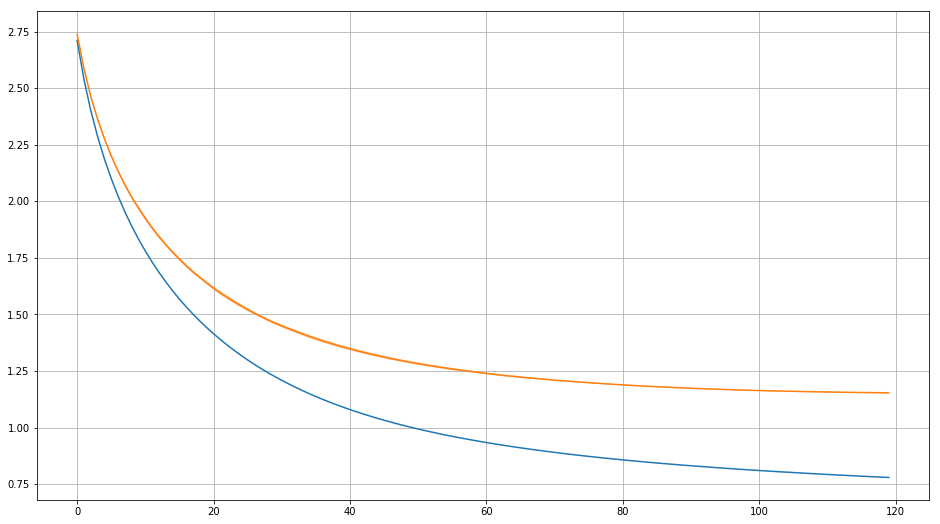

In [63]:
plt.figure(figsize=(16, 9))
plt.plot(result.loc[:, ('mean', slice(None))])
plt.fill_between(result.index, result.loc[:, ('mean', 'train')]-result.loc[:, ('std', 'train')], 
    result.loc[:, ('mean', 'train')]+result.loc[:, ('std', 'train')], alpha=0.5)
plt.fill_between(result.index, result.loc[:, ('mean', 'val')]-result.loc[:, ('std', 'val')], 
    result.loc[:, ('mean', 'val')]+result.loc[:, ('std', 'val')], alpha=0.5)
plt.grid()

Prediction from my model

In [64]:
preds = model.predict(xgb.DMatrix(x_test.values))

df_preds = pd.DataFrame(preds, index=x_test.index, columns=target_cols)
# Remove already bought products 
df_preds[x_test[target_cols]==1] = 0 
preds = df_preds.values
preds = np.argsort(preds, axis=1)
preds = np.fliplr(preds)[:, :7]

Write out prediction results from my model

In [65]:
test_id = x_test.loc[:, 'ncodpers'].values
final_preds = [' '.join([target_cols[k] for k in pred]) for pred in preds]

out_df = pd.DataFrame({'ncodpers': test_id, 'added_products': final_preds})
out_df.to_csv('eda_4_19.csv.gz', compression='gzip', index=False)

In [8]:
#pd.Series(x_train.columns).to_csv('x_train_cols.csv')

In [66]:
result

quantity      mean                 std          
data         train       val     train       val
0         2.709650  2.737948  0.003042  0.006413
1         2.537799  2.585890  0.003092  0.007395
2         2.400399  2.462605  0.002721  0.005988
3         2.285753  2.362373  0.002756  0.007572
4         2.186498  2.276388  0.002374  0.006654
5         2.099958  2.199962  0.001854  0.007435
6         2.022562  2.133389  0.001471  0.007408
7         1.953028  2.072215  0.001519  0.007304
8         1.890070  2.017909  0.001354  0.007313
9         1.832519  1.969816  0.001118  0.008394
10        1.779567  1.924395  0.001248  0.008171
11        1.730807  1.882008  0.001423  0.007743
12        1.685651  1.843572  0.001232  0.007701
13        1.643548  1.807977  0.001050  0.006676
14        1.604238  1.774814  0.001026  0.006569
15        1.567326  1.744062  0.000939  0.007119
16        1.532873  1.714613  0.000839  0.006687
17        1.500566  1.687553  0.000779  0.006408
18        1.470090  1.662915  0.000646  0.006002
19        1.441503  1.638947  0.000653  0.006664
20        1.414461  1.616030  0.000596  0.006827
21        1.388798  1.594763  0.000518  0.007947
22        1.364423  1.575491  0.000530  0.007601
23        1.341339  1.556229  0.000543  0.007224
24        1.319461  1.538466  0.000437  0.007095
25        1.298664  1.521313  0.000324  0.006711
26        1.278823  1.505194  0.000240  0.006373
27        1.259978  1.490089  0.000261  0.006125
28        1.242011  1.475138  0.000200  0.006021
29        1.224916  1.462051  0.000209  0.006084
..             ...       ...       ...       ...
90        0.831096  1.173639  0.000569  0.001686
91        0.828765  1.172375  0.000551  0.001585
92        0.826528  1.171184  0.000539  0.001470
93        0.824350  1.170091  0.000525  0.001334
94        0.822228  1.169064  0.000516  0.001278
95        0.820102  1.168070  0.000532  0.001216
96        0.818026  1.167060  0.000539  0.001279
97        0.815960  1.166084  0.000502  0.001239
98        0.813939  1.165155  0.000516  0.001213
99        0.811998  1.164222  0.000567  0.001209
100       0.810099  1.163420  0.000598  0.001225
101       0.808217  1.162718  0.000567  0.001288
102       0.806395  1.161966  0.000567  0.001343
103       0.804569  1.161329  0.000549  0.001358
104       0.802814  1.160654  0.000566  0.001370
105       0.801057  1.159988  0.000533  0.001380
106       0.799326  1.159339  0.000482  0.001486
107       0.797587  1.158668  0.000483  0.001484
108       0.795904  1.158077  0.000471  0.001497
109       0.794243  1.157624  0.000454  0.001627
110       0.792646  1.157009  0.000501  0.001677
111       0.791047  1.156500  0.000522  0.001701
112       0.789489  1.155978  0.000502  0.001762
113       0.788013  1.155596  0.000524  0.001766
114       0.786520  1.155149  0.000483  0.001711
115       0.785047  1.154798  0.000458  0.001751
116       0.783617  1.154409  0.000477  0.001790
117       0.782177  1.154106  0.000467  0.001818
118       0.780771  1.153604  0.000446  0.001784
119       0.779365  1.153305  0.000454  0.001745

[120 rows x 4 columns]